In [1]:
from sciSOM import *
import pandas as pd
import numpy as np
import random
from scipy.spatial.distance import cdist

In [2]:
# Lets make a simple dataset which we understand
# I will generate 4 data classes centered at 1,1 1,2 2,1 2,2
# Add some gaussian noise to each of those classes and see
# If the SOM was able to separate them!
n_samples = 2000  # Total number of samples
centers = np.array([[1, 1], [1, 2], [2, 1], [2, 2]])  # Centers of the 4 Gaussian distributions
std_dev = 0.1  # Standard deviation of the Gaussian distributions
n_centers = len(centers)
samples_per_center = n_samples // n_centers

In [3]:
data = []
for center in centers:
    samples = np.random.normal(loc=center, scale=std_dev, size=(samples_per_center, 2))
    data.append(samples)

# Combine all samples into a single array
gaussian_data_4_classes = np.vstack(data)

In [4]:
gaussian_data_4_classes_norm = affine_transform(gaussian_data_4_classes, 0, 1)


In [5]:
dtype = np.dtype([
    ('time', 'i8'),  # Unicode string of max length 10
    ('alpha', 'float'),    # 4-byte integer
    ('beta', 'float'),  # 4-byte float
    ('gamma', 'float')
])

In [6]:
dtypek = np.dtype([
    ('time', 'i8'),  # Unicode string of max length 10
    ('alpha', 'float'),    # 4-byte integer
    ('sigma', 'float'),  # 4-byte float
    ('max_radius', 'i4')
])

In [7]:
parameters = np.zeros(1, dtype=dtype)
parameters_schedule = np.zeros(4, dtype=dtype)
#parameters_schedule[0] = (2000, 0.3, 0.2, 3)
#parameters_schedule[1] = (8000, 0.07, 0.1, 2)
#parameters_schedule[2] = (20000, 0.07, 0.1, 2)

In [8]:
ksom_parm = np.zeros(3, dtype = dtypek)

In [9]:
ksom_parm[0] = (2000, 0.3, 0.3, 3)
ksom_parm[1] = (8000, 0.1, 0.3, 2)
ksom_parm[2] = (20000, 0.05, 0.3, 1)

In [10]:
parameters[0] = (0, 0.4, 0.04, 0.3)

In [11]:
parameters_schedule[0] = (2000, 0.3, 0.01, 0.3)
parameters_schedule[1] = (8000, 0.01, 0.005, 0.1)
parameters_schedule[2] = (20000, 0.001, 0.001, 0.05)
parameters_schedule[3] = (100000, 0.01, 0.0005, 0.01)

In [19]:
som_model_simple = SOM(x_dim = 7, y_dim = 7, input_dim = 2, n_iter=20000,
                       learning_parameters=parameters_schedule,
                       som_type = "cSOM",
                       decay_type='schedule', mode = "batch", #neighborhood_decay = "none",#"geometric_series"
                       save_weight_cube_history=True,
                      gamma_off = True)

In [20]:
som_model_simple.train(gaussian_data_4_classes_norm)

In [21]:
som_model_simple.weight_cube_history

array([[6357.,   82.,  421.,  908.,  659.,  722.,  749.],
       [ 147.,  527.,  130.,  102.,   89.,  465.,  320.],
       [ 105.,  191.,   58.,  176.,   95.,   95.,   29.],
       [ 244.,  152.,  193.,  131.,  107.,  112.,  198.],
       [1204.,  293.,  262.,  142.,  225.,  107.,  111.],
       [1682.,  166.,  236.,  109.,  120.,  111.,   32.],
       [1042.,   47.,  188.,  129.,   99.,   47.,   84.]])

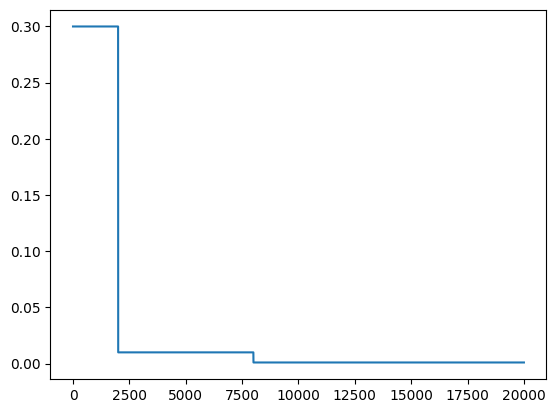

In [15]:
plt.plot(som_model_simple.learning_rate_history)

Text(0.5, 1.0, 'n_iter = 10000 (gamma = 0)')

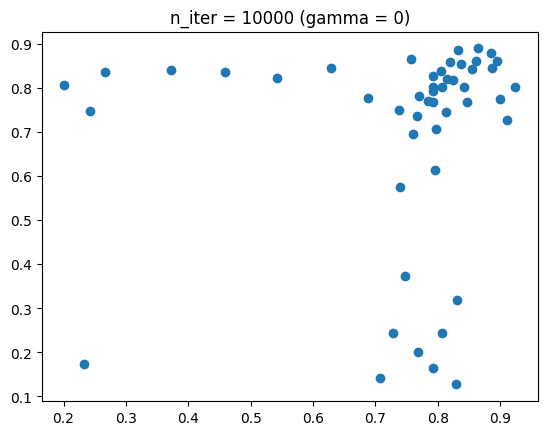

In [22]:
plt.scatter(som_model_simple.weight_cube.reshape(7*7,2)[:,0],
           som_model_simple.weight_cube.reshape(7*7,2)[:,1],)
plt.title("n_iter = 10000 (gamma = 0)")

Text(0.5, 1.0, 'n_iter = 10000')

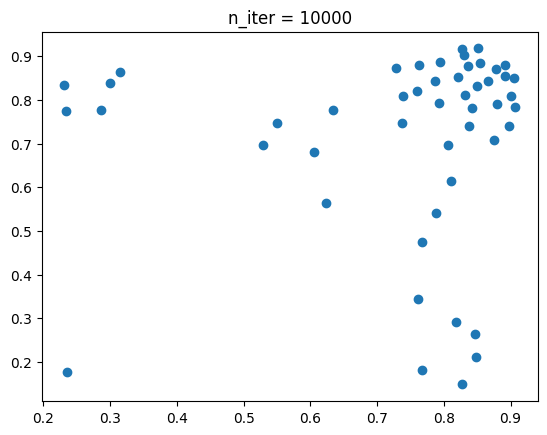

In [18]:
plt.scatter(som_model_simple.weight_cube.reshape(7*7,2)[:,0],
           som_model_simple.weight_cube.reshape(7*7,2)[:,1],)
plt.title("n_iter = 10000")

In [17]:
plt.scatter(som_model_simple.weight_cube.reshape(25,2)[:,0],
           som_model_simple.weight_cube.reshape(25,2)[:,1],)
plt.title("n_iter = 100")

ValueError: cannot reshape array of size 98 into shape (25,2)

Text(0.5, 1.0, 'n_iter = 1000')

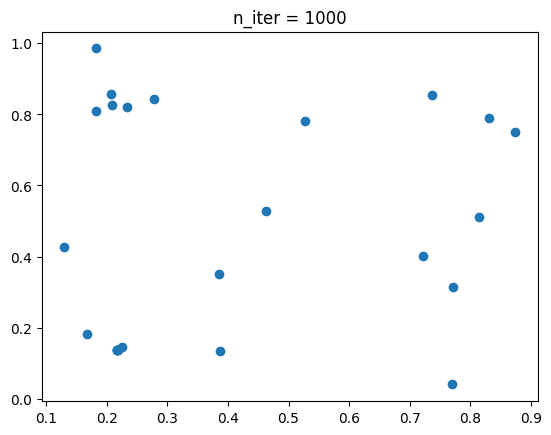

In [105]:
plt.scatter(som_model_simple.weight_cube.reshape(25,2)[:,0],
           som_model_simple.weight_cube.reshape(25,2)[:,1],)
plt.title("n_iter = 1000")

Text(0.5, 1.0, 'n_iter = 1000')

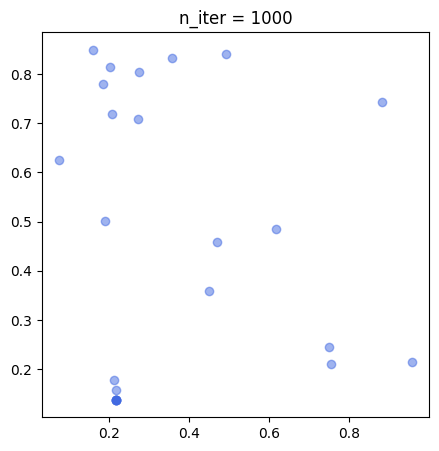

In [63]:
plt.subplots(figsize=(5, 5))

plt.scatter(som_model_simple.weight_cube.reshape(25,2)[:,0],
           som_model_simple.weight_cube.reshape(25,2)[:,1],
           alpha = 0.5, color = 'royalblue')
plt.title("n_iter = 1000")

Text(0.5, 1.0, 'n_iter = 10000')

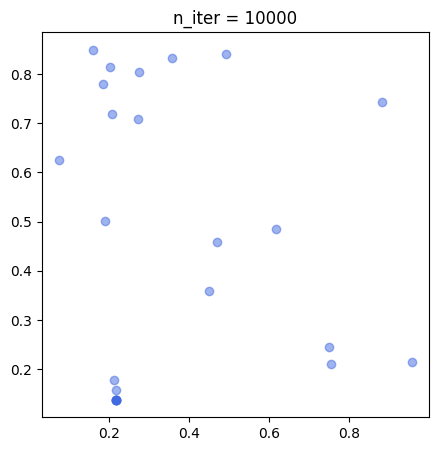

In [64]:
plt.subplots(figsize=(5, 5))

plt.scatter(som_model_simple.weight_cube.reshape(25,2)[:,0],
           som_model_simple.weight_cube.reshape(25,2)[:,1],
           alpha = 0.5, color = 'royalblue')
plt.title("n_iter = 10000")

In [65]:
np.min(gaussian_data_4_classes_norm)

np.float64(0.0)

In [66]:
(som_model_simple.bais_matrix).shape[-1]

5

In [67]:
som_model_simple.weight_cube.reshape(25,2)[:,1]

array([0.50046919, 0.2456628 , 0.13806264, 0.13806264, 0.74380166,
       0.84929979, 0.45823955, 0.13806851, 0.13806592, 0.2097713 ,
       0.81364518, 0.78070496, 0.13837674, 0.13819696, 0.2145616 ,
       0.83355238, 0.80449651, 0.17857315, 0.15874042, 0.62631669,
       0.70787633, 0.84107535, 0.48554356, 0.71791753, 0.35831187])

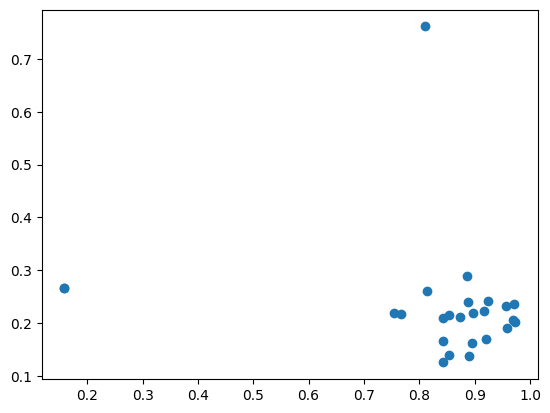

In [26]:
plt.scatter(som_model_simple.weight_cube.reshape(25,2)[:,0],
           som_model_simple.weight_cube.reshape(25,2)[:,1],)

In [69]:
som_model_simple.bais_matrix_history

array([[[0.        , 0.        , 0.        , ..., 0.99528785,
         0.99528785, 0.99528785],
        [0.        , 0.        , 0.        , ..., 0.87155777,
         0.87155777, 0.87155777],
        [0.        , 0.        , 0.        , ..., 0.87537578,
         0.87537578, 0.87537578],
        [0.        , 0.        , 0.        , ..., 0.95316905,
         0.95316905, 0.95316905],
        [0.01      , 0.01      , 0.01      , ..., 0.99907776,
         0.99907776, 0.99907776]],

       [[0.        , 0.        , 0.        , ..., 0.81474221,
         0.81474221, 0.81474221],
        [0.        , 0.        , 0.        , ..., 0.81846552,
         0.81846552, 0.81846552],
        [0.        , 0.        , 0.        , ..., 0.86843837,
         0.86843837, 0.86843837],
        [0.        , 0.        , 0.        , ..., 0.87909251,
         0.87909251, 0.87909251],
        [0.        , 0.        , 0.        , ..., 0.87223548,
         0.87223548, 0.87223548]],

       [[0.        , 0.        , 0. 

In [20]:
bais_mat_vector = som_model_simple.bais_matrix_history.reshape(25,(som_model_simple.bais_matrix_history).shape[-1])

In [21]:
supression_mat_vector = som_model_simple.suppresion_matrix_history.reshape(25,(som_model_simple.suppresion_matrix_history).shape[-1])

Text(0, 0.5, 'bais matrix values')

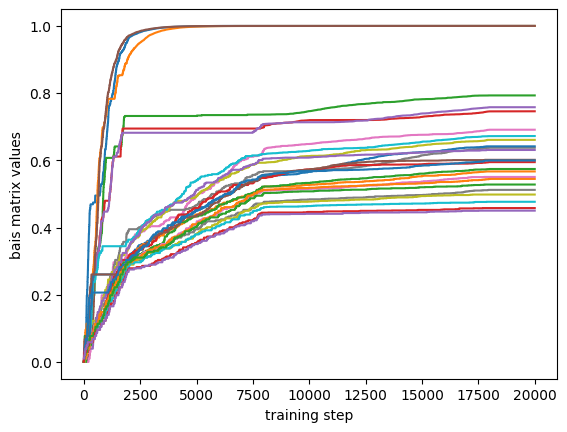

In [22]:
for i in np.arange(25):
    plt.plot(bais_mat_vector[i])
    
#plt.xlim(0,1000)
plt.xlabel("training step")
plt.ylabel("bais matrix values")

Text(0, 0.5, 'bais matrix values')

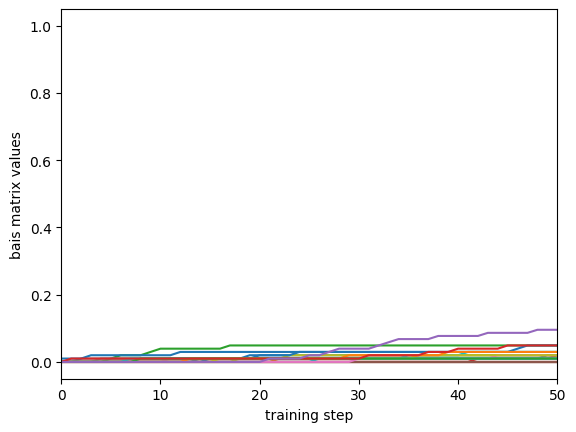

In [109]:
for i in np.arange(25):
    plt.plot(bais_mat_vector[i])
    
plt.xlim(0,50)
plt.xlabel("training step")
plt.ylabel("bais matrix values")

Text(0, 0.5, 'Supression matrix values')

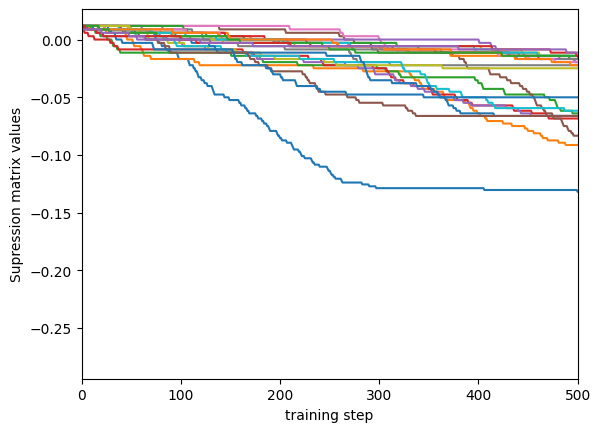

In [25]:
for i in np.arange(25):
    plt.plot(supression_mat_vector[i])
    
plt.xlim(0,500)
#plt.ylim(0,0.015)
plt.xlabel("training step")
plt.ylabel("Supression matrix values")

Text(0, 0.5, 'Supression matrix values')

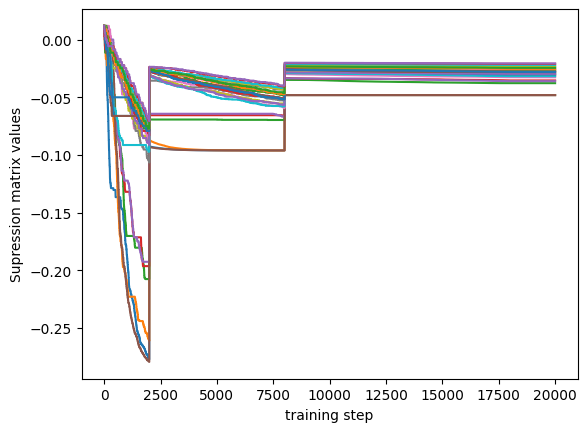

In [24]:
for i in np.arange(25):
    plt.plot(supression_mat_vector[i])
    
#plt.xlim(0,2000)
#plt.ylim(0,0.015)
plt.xlabel("training step")
plt.ylabel("Supression matrix values")

In [112]:
gaussian_data_4_classes_wcube = som_model_simple.weight_cube

In [113]:
len(gaussian_data_4_classes_norm)

2000

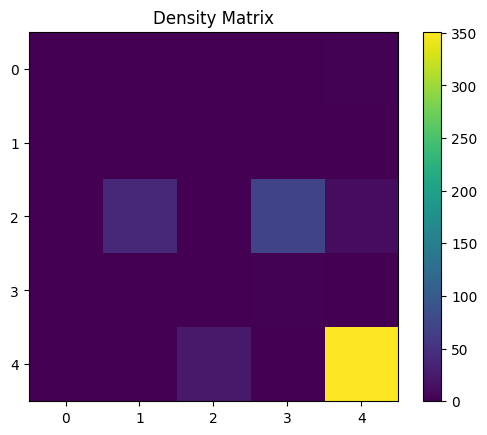

In [114]:
U_MAT = calculate_u_matrix(gaussian_data_4_classes_wcube)
DENS_MAT = calculate_density_matrix(gaussian_data_4_classes_wcube, 
                                    U_MAT, 
                                    gaussian_data_4_classes_norm[:500])
display_density_matrix(DENS_MAT)

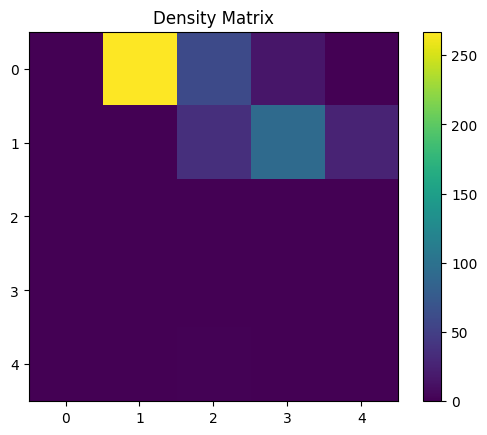

In [115]:
U_MAT = calculate_u_matrix(gaussian_data_4_classes_wcube)
DENS_MAT = calculate_density_matrix(gaussian_data_4_classes_wcube, 
                                    U_MAT, 
                                    gaussian_data_4_classes_norm[500:1000])
display_density_matrix(DENS_MAT)

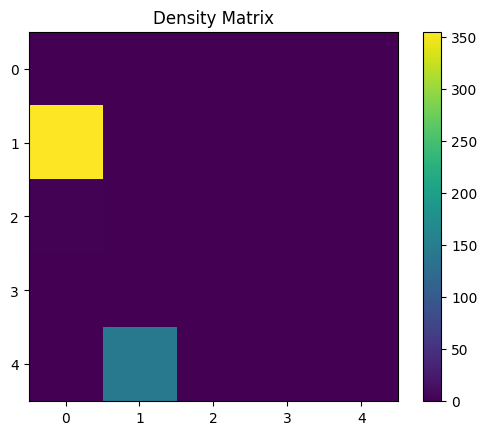

In [116]:
U_MAT = calculate_u_matrix(gaussian_data_4_classes_wcube)
DENS_MAT = calculate_density_matrix(gaussian_data_4_classes_wcube, 
                                    U_MAT, 
                                    gaussian_data_4_classes_norm[1000:1500])
display_density_matrix(DENS_MAT)

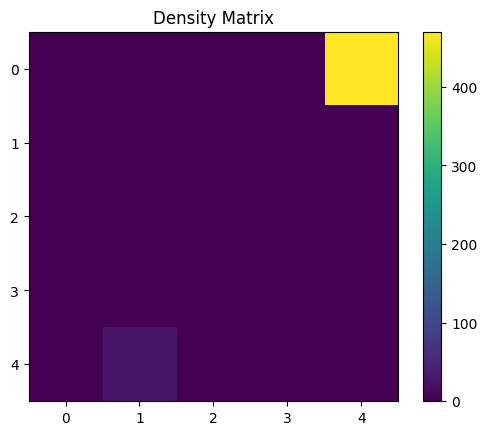

In [81]:
U_MAT = calculate_u_matrix(gaussian_data_4_classes_wcube)
DENS_MAT = calculate_density_matrix(gaussian_data_4_classes_wcube, 
                                    U_MAT, 
                                    gaussian_data_4_classes_norm[1500:])
display_density_matrix(DENS_MAT)

In [77]:
gaussian_data_4_classes_norm[0].reshape(1,2)
#data[int(indecies[iteration])].reshape(1,self.input_dim),

array([[0., 1.]])

In [10]:
som_model_simple.weight_cube.reshape(-1, som_model_simple.weight_cube.shape[-1])

array([[0.52252776, 0.09188167],
       [0.29709486, 0.36326271],
       [0.36354551, 0.19518023],
       [0.80537997, 0.90949245],
       [0.09050786, 0.99652523],
       [0.05403491, 0.71701745],
       [0.06837312, 0.67419464],
       [0.42750227, 0.49652058],
       [0.8009388 , 0.68172682],
       [0.73486492, 0.33279753],
       [0.32226838, 0.78123722],
       [0.50686476, 0.5048668 ],
       [0.19582163, 0.9977195 ],
       [0.50555956, 0.03899522],
       [0.77185473, 0.04193766],
       [0.71524954, 0.17287507],
       [0.06808256, 0.2089964 ],
       [0.58475083, 0.47103631],
       [0.04948757, 0.20916526],
       [0.51106283, 0.5214096 ],
       [0.07654304, 0.26911575],
       [0.51279194, 0.56024076],
       [0.56096732, 0.47997732],
       [0.98713948, 0.34866745],
       [0.32900034, 0.74555621]])

In [10]:
test = np.zeros((5,5))

In [12]:
test.reshape(-1, test.shape[-1])

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [16]:
np.multiply(test.shape)

TypeError: multiply() takes from 2 to 3 positional arguments but 1 were given